In [1]:
import GPy
import sys
import os
sys.path.append(os.getenv("HOME") + "/Documents/Code/Emulation/GPyDifferentMetrics/")
from HaversineDist import Exponentialhaversine
import numpy as np
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import glob as glob
from cmocean import cm as cm
from Utilities import *



GCM_dir = os.getenv("HOME")+'/Documents/Code/ModelDataComparison/DMC/Scripts/Model_data/CO2_anom/'
gcm_SSTs = glob.glob(GCM_dir+'t*.txt')

gcm_mask = np.genfromtxt(GCM_dir+'mask.txt', dtype='int')

obs_dir = os.getenv("HOME")+'/Documents/Code/ModelDataComparison/DMC/Scripts/Observation_data/P3+_SST_anom/'
file = 'lambda_10.txt'
observations = np.genfromtxt(obs_dir+file, skip_header=1)

X_obs = observations[:,0:2]
y_obs = observations[:,2].reshape(-1,1)
var_ratios = observations[:,3][:,None]**2

latsplot = np.arange(-90.0,90.0, 2.5)
longsplot = np.arange(-180.0,180.0, 2.5)
longgridplot, latgridplot = np.meshgrid(longsplot, latsplot)
X_plot=np.column_stack((longgridplot.flatten(), latgridplot.flatten())) # specifies the prediction locations


count=0
gcm_runs = np.zeros((8,27186))
gcm_runs_label = gcm_SSTs.copy()

for file_name in gcm_SSTs:
    file_nm = file_name.split(GCM_dir)[-1]
    print(file_nm)
    # Read in GCM output.
    gcm_runs[count,:] = np.genfromtxt(file_name)
    gcm_runs_label[count] = file_nm.split(".txt")[0]
    count +=1

tczyi.txt
tczyj.txt
tczyk.txt
tdgtg.txt
tdgth.txt
tdgti.txt
tdgtj.txt
tdgtk.txt


In [26]:
k = Exponentialhaversine(2)
dist = k._unscaled_dist(X_plot)

Warning - ARD must be False at the moment


In [7]:
from scipy.spatial.distance import squareform

In [10]:
squareform(dist)

4465

In [27]:
dist[0,:]

array([  0.00000000e+00,   1.70204636e-14,   3.40328264e-14, ...,
         1.97370995e+04,   1.97370995e+04,   1.97370995e+04])

In [13]:
95*94/2

4465.0

In [14]:
def SVh( X, y, h, bw ):
    '''
    Experimental semivariogram for a single lag
    '''
    pd = k._unscaled_dist( X )
    N = pd.shape[0]
    Z = list()
    for i in range(N):
        for j in range(i+1,N):
            if( pd[i,j] >= h-bw )and( pd[i,j] <= h+bw ):
                Z.append( ( y[i] - y[j] )**2.0 )
    return np.sum( Z ) / ( 2.0 * len( Z ) )


In [29]:
SVh(X_plot, gcm_runs[0,:],1000,1000)

0.13803064961021638

In [16]:
def SV( X, y, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( X, y, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T



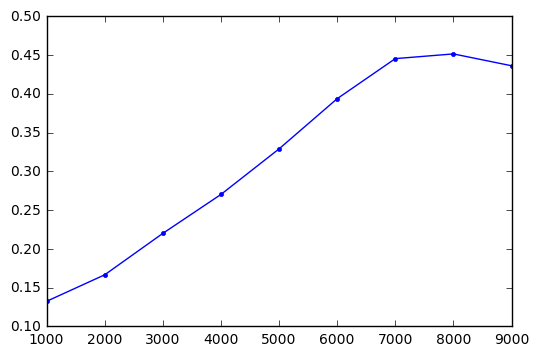

In [30]:
sv=SV(X_plot,gcm_runs[0,:], np.arange(1000,10000, 1000), 500)
plt.plot( sv[0], sv[1], '.-' )

In [20]:
np.arange(1000,10000, 1000)

array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

In [ ]:
gcm_r